<a href="https://colab.research.google.com/github/Murad-pitafi/Machine-Learning/blob/main/MNIST_Fashion_using_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

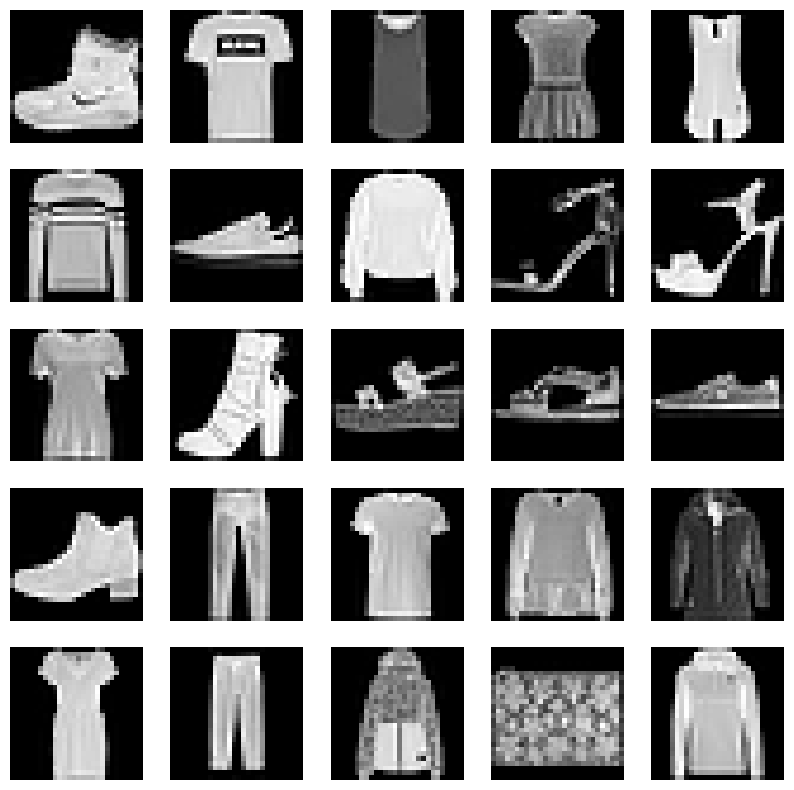

In [5]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

# Display a sample of the images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.axis('off')
plt.show()


In [6]:
xtrain = xtrain.reshape(-1, 28*28) / 255.0
xtest = xtest.reshape(-1, 28*28) / 255.0

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
x_train, x_test, y_train, y_test= train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

In [9]:
model = Sequential([Dense(128, activation='relu', input_shape=(28*28,)),
                    Dense(10, activation='softmax')])

model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
model1 = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))



Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2248 - accuracy: 0.9152 - val_loss: 0.3402 - val_accuracy: 0.8808
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2163 - accuracy: 0.9182 - val_loss: 0.3274 - val_accuracy: 0.8852
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2098 - accuracy: 0.9219 - val_loss: 0.3442 - val_accuracy: 0.8807
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2059 - accuracy: 0.9219 - val_loss: 0.3358 - val_accuracy: 0.8901
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2008 - accuracy: 0.9257 - val_loss: 0.3595 - val_accuracy: 0.8858
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1921 - accuracy: 0.9273 - val_loss: 0.3315 - val_accuracy: 0.8892
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1875 - accuracy: 0.9281 - val_loss: 0.3317 - val_accuracy:

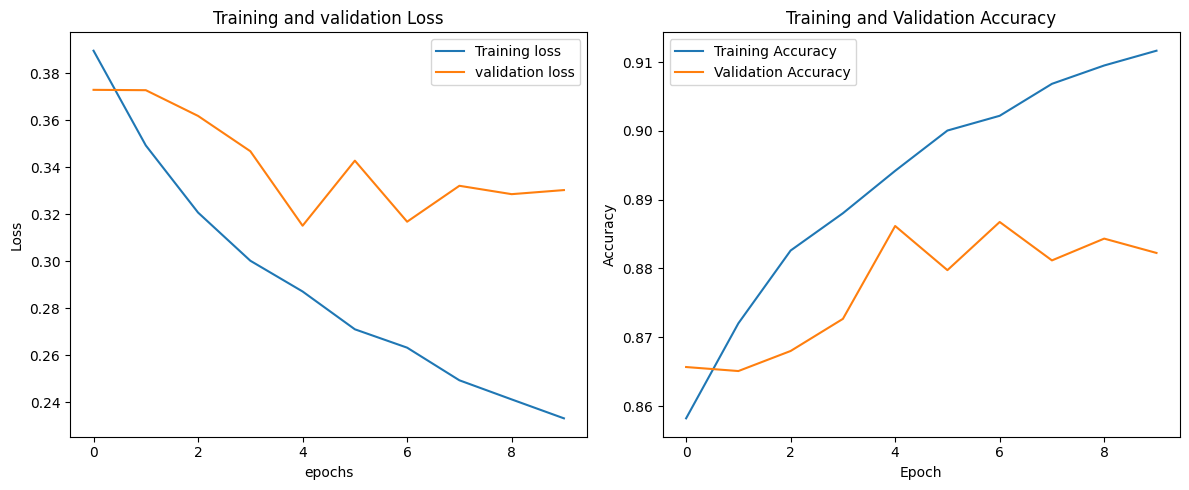

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(model1.history['loss'], label='Training loss')
plt.plot(model1.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model1.history['accuracy'], label='Training Accuracy')
plt.plot(model1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# let's add one more hidden layer and see the results
model2 = Sequential([Dense(128, activation='relu', input_shape=(28*28,)),
                    Dense(64, activation = 'tanh'),
                    Dense(10, activation='softmax')])

model2.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
model3 = model2.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))



Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2205 - accuracy: 0.9174 - val_loss: 0.3338 - val_accuracy: 0.8821
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2137 - accuracy: 0.9202 - val_loss: 0.3299 - val_accuracy: 0.8853
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2094 - accuracy: 0.9213 - val_loss: 0.3121 - val_accuracy: 0.8912
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1996 - accuracy: 0.9244 - val_loss: 0.3157 - val_accuracy: 0.8891
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1956 - accuracy: 0.9266 - val_loss: 0.3150 - val_accuracy: 0.8916
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1878 - accuracy: 0.9289 - val_loss: 0.3291 - val_accuracy: 0.8903
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1853 - accuracy: 0.9304 - val_loss: 0.3268 - val_accuracy:

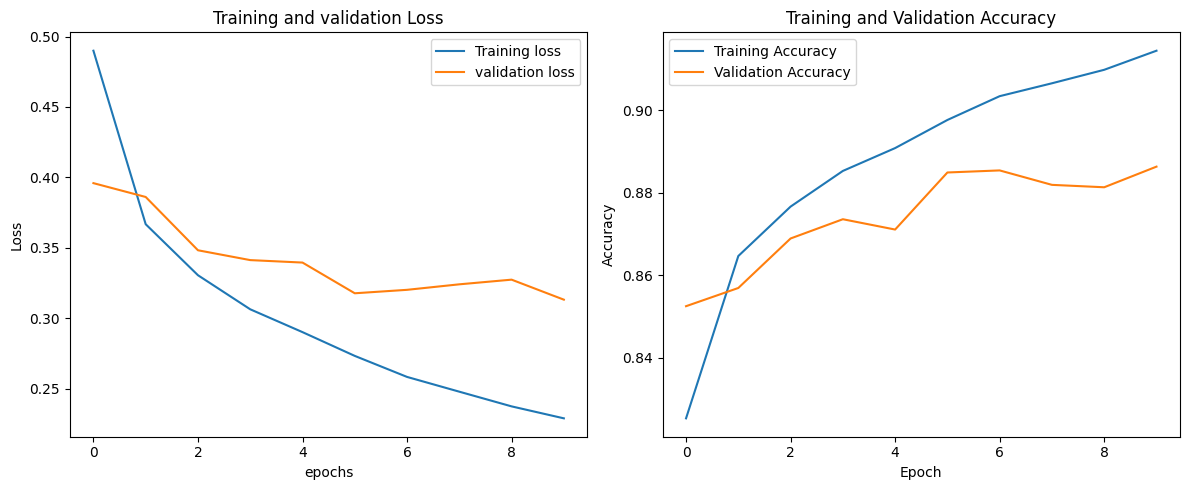

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(model3.history['loss'], label='Training loss')
plt.plot(model3.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model3.history['accuracy'], label='Training Accuracy')
plt.plot(model3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:

from sklearn.model_selection import GridSearchCV

In [35]:
def create_model(hidden_units, learning_rate):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(28*28,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Training model with hidden units: 64, learning rate: 0.001
Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5416 - accuracy: 0.8117 - val_loss: 0.4231 - val_accuracy: 0.8497
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4003 - accuracy: 0.8574 - val_loss: 0.3819 - val_accuracy: 0.8637
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3620 - accuracy: 0.8714 - val_loss: 0.3525 - val_accuracy: 0.8754
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8785 - val_loss: 0.3565 - val_accuracy: 0.8736
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8846 - val_loss: 0.3447 - val_accuracy: 0.8771
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3034 - accuracy: 0.8886 - val_loss: 0.3482 - val_accuracy: 0.8753
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0

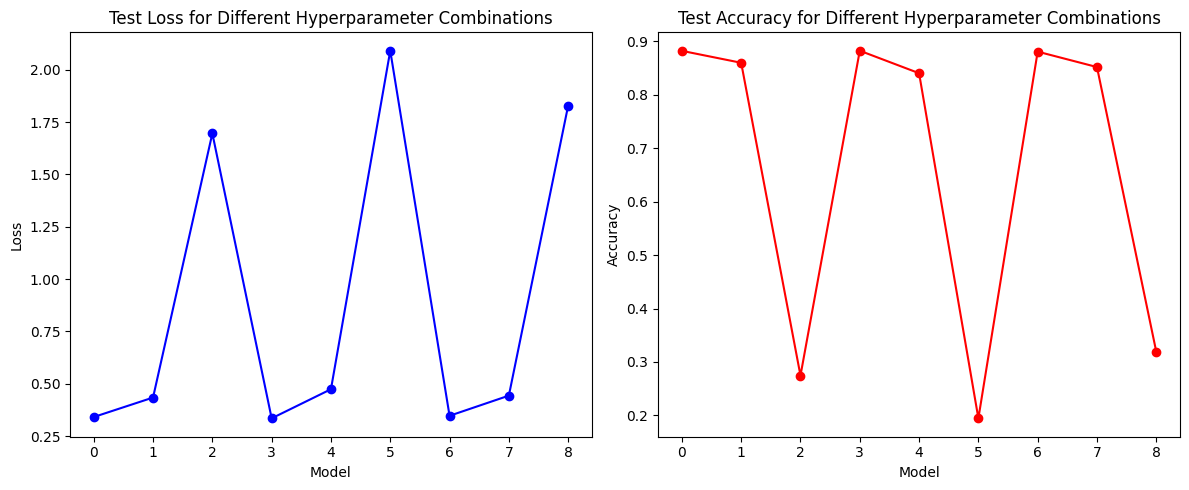

In [37]:
hidden_units_values = [64, 128, 256]
learning_rate_values = [0.001, 0.01, 0.1]
losses = []
accuracies = []
for hidden_units in hidden_units_values:
    for learning_rate in learning_rate_values:
        print(f"Training model with hidden units: {hidden_units}, learning rate: {learning_rate}")

        model = create_model(hidden_units, learning_rate)

        model4 = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))

        loss , accuracy = model.evaluate(x_test, y_test)

        print(f"Test loss: {loss}, Test accuracy: {accuracy}")
        losses.append(loss)
        accuracies.append(accuracy)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, 'bo-')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Test Loss for Different Hyperparameter Combinations')

plt.subplot(1, 2, 2)
plt.plot(accuracies, 'ro-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Hyperparameter Combinations')

plt.tight_layout()
plt.show()


## Comparative Analysis of Neural Network Architectures and Hyperparameter Tuning for Fashion-MNIST Classification

### **Abstract:**
This study investigates the performance of neural network architectures and hyperparameter tuning techniques for the task of classifying Fashion-MNIST dataset. The research compares the effectiveness of models with different numbers of hidden layers and activation functions, as well as explores the impact of varying hyperparameters such as learning rates and hidden units. The experimental results reveal insights into the trade-offs between model complexity and performance, shedding light on the factors that contribute to the accuracy of neural network classifiers.

### **1. Introduction:**
Fashion-MNIST is a popular benchmark dataset in the field of computer vision, consisting of grayscale images of fashion items belonging to 10 different classes. Classification of Fashion-MNIST poses a challenging problem due to the intricate visual features present in the images. Neural networks offer a powerful framework for learning complex patterns from data and have shown promising results in image classification tasks. However, the design choices and hyperparameter settings of neural networks significantly influence their performance. This study aims to investigate the impact of neural network architectures and hyperparameter tuning on the accuracy of Fashion-MNIST classification.

### **2. Methodology:**
The experimental setup involves several steps, including data loading, preprocessing, model construction, training, and evaluation. The Fashion-MNIST dataset is loaded and split into training and testing sets. A baseline neural network model with a single hidden layer is constructed, followed by a more complex architecture with two hidden layers and additional activation functions. Hyperparameter tuning is performed using grid search with different combinations of learning rates and hidden units. The models are trained for 10 epochs, and their performance is evaluated based on accuracy metrics.

### **3. Results:**
The baseline model with a single hidden layer achieves a validation accuracy of 88.39% after 10 epochs, indicating reasonable performance. The addition of a second hidden layer with tanh activation function results in a slight improvement, with a validation accuracy of 88.98%. Hyperparameter tuning reveals varying effects on model performance. Models with lower learning rates generally perform better, while the choice of hidden units has a nuanced impact on accuracy. For instance, models with 128 hidden units and a learning rate of 0.001 achieve the highest accuracy of 88.23%.

### **4. Discussion:**
The results suggest that while increasing model complexity may lead to marginal improvements in accuracy, the choice of hyperparameters plays a crucial role in determining overall performance. Lower learning rates tend to result in better generalization, indicating the importance of fine-tuning this parameter. However, the optimal combination of hyperparameters may vary depending on the specific characteristics of the dataset and the complexity of the task.

### **5. Conclusion:**
In conclusion, this study provides valuable insights into the design and optimization of neural network models for Fashion-MNIST classification. The findings highlight the trade-offs between model complexity and performance, as well as the importance of hyperparameter tuning in achieving high accuracy. Future research could explore more advanced architectures and optimization techniques to further enhance the classification performance on Fashion-MNIST and similar datasets.